# Analyzing G20 Countries: A Data Analytics Project

### Introduction:

Welcome to our data analytics project where we explore economic and social insights within the G20 nations using World Bank data. In this Jupyter notebook, we'll walk through the key steps of data collection, transformation, and analysis to derive meaningful conclusions from the available information.

### Project Overview:

The G20, a group of major economies, plays a significant role in global affairs. This analysis aims to uncover patterns and trends within the economic and social indicators provided by the World Bank for these influential nations.

### Methodology:

We leveraged the World Bank API (wbdata) for seamless data collection and used pandas for data transformation and cleaning. Our approach ensures a reliable dataset for exploration and analysis.

### Key Steps:

Data Collection: Utilized the wbdata API to gather economic and social indicators for G20 countries from the World Bank.

Data Transformation and Cleaning: Employed pandas for transforming and cleaning the data, addressing missing values and ensuring consistency.

Exploratory Data Analysis (EDA): Explored the dataset through visualizations and statistical analyses to uncover insights.

Insight Generation: Our goal is to distill actionable insights, providing a deeper understanding of economic and social dynamics.

### Why G20 Countries?

The G20 represents a diverse group of economies, each with its unique challenges and strengths. Analyzing this collective dataset allows us to draw comparisons, highlight commonalities, and understand the global impact of economic and social policies.

In [1]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wbdata


In [3]:
wbdata.search_indicators("GDP")

id                          name
--------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
6.0.GDP_current             GDP (current $)
6.0.GDP_growth              GDP growth (annual %)
6.0.GDP_usd                 GDP (constant 2005 $)
6.0.GDPpc_constant          GDP per capita, PPP (constant 2011 international $)
BG.GSR.NFSV.GD.ZS           Trade in services (% of GDP)
BG.KAC.FNEI.GD.PP.ZS        Gross private capital flows (% of GDP, PPP)
BG.KAC.FNEI.GD.ZS           Gross private capital flows (% of GDP)
BG.KLT.DINV.GD.PP.ZS        Gross foreign direct investment (% of GDP, PPP)
BG.KLT.DINV.GD.ZS           Gross foreign direct investment (% of GDP)
BI.WAG.TOTL.GD.ZS           Wage bill as a percentage of GDP
BM.GSR.MRCH.ZS              Merchandise imports (BOP): percentage of GDP (%)
BM.KLT.DINV.GD.ZS           Foreign direct investment, net outfl

In [4]:
indicators = {'Indicator Name': [
        'Gross Domestic Product (GDP)',
        'Gross National Income (GNI)',
        'Inflation rate',
        'Unemployment rate',
        'Poverty rate',
        'Life expectancy',
        'Literacy rate',
        'Access to electricity',
        'Mobile phone subscriptions',
        'Government expenditure on education',
        'Foreign direct investment (FDI)',
        'Exports of goods and services',
        'Imports of goods and services',
        'Gross capital formation',
        'Agricultural land area',
        'Agricultural production index'
    ],
    'Indicator ID': [
        'NY.GDP.MKTP.CD',
        'NY.GNP.MKTP.CD',
        'FP.CPI.TOTL.ZG',
        'SL.UEM.TOTL.ZS',
        'SI.POV.NAHC',
        'SP.DYN.LE00.IN',
        'SE.ADT.LITR.ZS',
        'EG.ELC.ACCS.ZS',
        'IT.CEL.SETS.P2',
        'SE.XPD.TOTL.GB.ZS',
        'BX.KLT.DINV.WD.GD.ZS',
        'NE.EXP.GNFS.ZS',
        'NE.IMP.GNFS.ZS',
        'NE.GDI.TOTL.ZS',
        'AG.LND.AGRI.ZS',
        'AG.PRD.FOOD.XD'
    ]
             }

In [5]:
indicators

{'Indicator Name': ['Gross Domestic Product (GDP)',
  'Gross National Income (GNI)',
  'Inflation rate',
  'Unemployment rate',
  'Poverty rate',
  'Life expectancy',
  'Literacy rate',
  'Access to electricity',
  'Mobile phone subscriptions',
  'Government expenditure on education',
  'Foreign direct investment (FDI)',
  'Exports of goods and services',
  'Imports of goods and services',
  'Gross capital formation',
  'Agricultural land area',
  'Agricultural production index'],
 'Indicator ID': ['NY.GDP.MKTP.CD',
  'NY.GNP.MKTP.CD',
  'FP.CPI.TOTL.ZG',
  'SL.UEM.TOTL.ZS',
  'SI.POV.NAHC',
  'SP.DYN.LE00.IN',
  'SE.ADT.LITR.ZS',
  'EG.ELC.ACCS.ZS',
  'IT.CEL.SETS.P2',
  'SE.XPD.TOTL.GB.ZS',
  'BX.KLT.DINV.WD.GD.ZS',
  'NE.EXP.GNFS.ZS',
  'NE.IMP.GNFS.ZS',
  'NE.GDI.TOTL.ZS',
  'AG.LND.AGRI.ZS',
  'AG.PRD.FOOD.XD']}

In [6]:
indicators = pd.DataFrame(indicators)

In [7]:
indicators

,Indicator Name,Indicator ID
0,Gross Domestic Product (GDP),NY.GDP.MKTP.CD
1,Gross National Income (GNI),NY.GNP.MKTP.CD
2,Inflation rate,FP.CPI.TOTL.ZG
3,Unemployment rate,SL.UEM.TOTL.ZS
4,Poverty rate,SI.POV.NAHC
5,Life expectancy,SP.DYN.LE00.IN
6,Literacy rate,SE.ADT.LITR.ZS
7,Access to electricity,EG.ELC.ACCS.ZS
8,Mobile phone subscriptions,IT.CEL.SETS.P2
9,Government expenditure on education,SE.XPD.TOTL.GB.ZS


In [8]:
from datetime import datetime

In [9]:
# Define the start and end dates for the desired date range
start_date = '2015-01-01'
end_date = '2020-12-31'

# Convert the start date string to a datetime object
start_date_obj = datetime.strptime(start_date, "%Y-%m-%d")

# Convert the end date string to a datetime object
end_date_obj = datetime.strptime(end_date, "%Y-%m-%d")

# Create a tuple containing the start and end date objects
data_date = (start_date_obj, end_date_obj)


In [10]:
data_date

(datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2020, 12, 31, 0, 0))

In [11]:
# Creating a DataFrame.

new_df = pd.DataFrame()

In [12]:
# Retreiving the world bank data for Gross Domestic Product.

pd.DataFrame(wbdata.get_data('NY.GDP.MKTP.CD', country='all', data_date=data_date, pandas=True))

value
country                     date              
Africa Eastern and Southern 2020  9.275933e+11
                            2019  1.000834e+12
                            2018  1.007196e+12
                            2017  1.021043e+12
                            2016  8.851764e+11
...                                        ...
Zimbabwe                    2019  2.183223e+10
                            2018  3.415607e+10
                            2017  1.758489e+10
                            2016  2.054868e+10
                            2015  1.996312e+10

[1596 rows x 1 columns]

In [13]:
# Extracting indicators for GDP by the indicator ID.

indicators[indicators['Indicator ID'] == 'NY.GDP.MKTP.CD']['Indicator Name'].values[0]

'Gross Domestic Product (GDP)'

In [14]:
df=pd.DataFrame()

In [15]:
# Iterate through each indicator ID in the 'Indicator ID' column of the indicators DataFrame
for i in indicators['Indicator ID']:
    
    # Fetch World Bank data for the current indicator ID, all countries, and the specified date range
    new_df = wbdata.get_data(indicator=i, country='all', data_date=data_date, pandas=True)
    
    # Convert the data to a pandas DataFrame and reset the index
    new_df = pd.DataFrame(new_df).reset_index()
    
    # Rename the columns of the new DataFrame
    new_df.columns = ['country', 'year', indicators[indicators['Indicator ID'] == i]['Indicator Name'].values[0]]
    
    # Concatenate the new DataFrame with the existing DataFrame (df) along the columns (axis=1)
    df = pd.concat([df, new_df], axis=1)


In [16]:
df.head()

,country,year,Gross Domestic Product (GDP),country,year,Gross National Income (GNI),country,year,Inflation rate,country,...,Imports of goods and services,country,year,Gross capital formation,country,year,Agricultural land area,country,year,Agricultural production index
0,Africa Eastern and Southern,2020,9.275933e+11,Africa Eastern and Southern,2020,9.075397e+11,Africa Eastern and Southern,2020,7.321106,Africa Eastern and Southern,...,23.855003,Africa Eastern and Southern,2020,20.357183,Africa Eastern and Southern,2020,46.467608,Africa Eastern and Southern,2020,NaN
1,Africa Eastern and Southern,2019,1.000834e+12,Africa Eastern and Southern,2019,9.723981e+11,Africa Eastern and Southern,2019,4.653665,Africa Eastern and Southern,...,27.000821,Africa Eastern and Southern,2019,21.868426,Africa Eastern and Southern,2019,46.419375,Africa Eastern and Southern,2019,NaN
2,Africa Eastern and Southern,2018,1.007196e+12,Africa Eastern and Southern,2018,9.778204e+11,Africa Eastern and Southern,2018,4.720811,Africa Eastern and Southern,...,28.699467,Africa Eastern and Southern,2018,21.036979,Africa Eastern and Southern,2018,46.361118,Africa Eastern and Southern,2018,NaN
3,Africa Eastern and Southern,2017,1.021043e+12,Africa Eastern and Southern,2017,9.897903e+11,Africa Eastern and Southern,2017,6.399343,Africa Eastern and Southern,...,26.242349,Africa Eastern and Southern,2017,20.873019,Africa Eastern and Southern,2017,46.271150,Africa Eastern and Southern,2017,NaN
4,Africa Eastern and Southern,2016,8.851764e+11,Africa Eastern and Southern,2016,8.624134e+11,Africa Eastern and Southern,2016,6.571396,Africa Eastern and Southern,...,27.248678,Africa Eastern and Southern,2016,20.685884,Africa Eastern and Southern,2016,46.152439,Africa Eastern and Southern,2016,NaN


In [17]:
# Creating  copy of the dataframe:

df_1 = df.copy()

In [18]:
# Dropping first two columns i.e Country and Year

df_1 = df_1.drop(['country','year'],axis=1)

In [19]:
df_1.head()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,9.275933e+11,9.075397e+11,7.321106,7.631304,NaN,63.313860,72.785622,46.268621,71.060934,15.501787,1.398683,22.161854,23.855003,20.357183,46.467608,NaN
1,1.000834e+12,9.723981e+11,4.653665,7.121663,NaN,63.755678,72.634972,44.389773,68.736999,4.189875,1.502827,23.890630,27.000821,21.868426,46.419375,NaN
2,1.007196e+12,9.778204e+11,4.720811,6.913046,NaN,63.365863,71.392616,43.028332,72.317182,3.002484,1.345126,25.362832,28.699467,21.036979,46.361118,NaN
3,1.021043e+12,9.897903e+11,6.399343,6.940365,NaN,62.922390,71.009071,40.197332,64.222619,1.704694,0.990504,22.297917,26.242349,20.873019,46.271150,NaN
4,8.851764e+11,8.624134e+11,6.571396,6.855589,NaN,62.444050,71.095200,38.851444,64.284955,NaN,1.890703,22.012799,27.248678,20.685884,46.152439,NaN


In [20]:
# Extracting first three columns:

df.iloc[:,0:2]

,country,year
0,Africa Eastern and Southern,2020
1,Africa Eastern and Southern,2019
2,Africa Eastern and Southern,2018
3,Africa Eastern and Southern,2017
4,Africa Eastern and Southern,2016
...,...,...
1591,Zimbabwe,2019
1592,Zimbabwe,2018
1593,Zimbabwe,2017
1594,Zimbabwe,2016


In [21]:
df_1 = pd.concat([df.iloc[:,0:2],df_1],axis=1)

In [22]:
df_1.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Africa Eastern and Southern,2020,9.275933e+11,9.075397e+11,7.321106,7.631304,NaN,63.313860,72.785622,46.268621,71.060934,15.501787,1.398683,22.161854,23.855003,20.357183,46.467608,NaN
1,Africa Eastern and Southern,2019,1.000834e+12,9.723981e+11,4.653665,7.121663,NaN,63.755678,72.634972,44.389773,68.736999,4.189875,1.502827,23.890630,27.000821,21.868426,46.419375,NaN
2,Africa Eastern and Southern,2018,1.007196e+12,9.778204e+11,4.720811,6.913046,NaN,63.365863,71.392616,43.028332,72.317182,3.002484,1.345126,25.362832,28.699467,21.036979,46.361118,NaN
3,Africa Eastern and Southern,2017,1.021043e+12,9.897903e+11,6.399343,6.940365,NaN,62.922390,71.009071,40.197332,64.222619,1.704694,0.990504,22.297917,26.242349,20.873019,46.271150,NaN
4,Africa Eastern and Southern,2016,8.851764e+11,8.624134e+11,6.571396,6.855589,NaN,62.444050,71.095200,38.851444,64.284955,NaN,1.890703,22.012799,27.248678,20.685884,46.152439,NaN


In [23]:
countries=['Argentina', 'Australia','Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States']

In [24]:
# Extract only those columns which match with the df_1 dataframe.

dff = df_1[df_1['country'].isin(countries)]

In [25]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
336,Argentina,2020,3.855404e+11,3.755360e+11,NaN,11.460,42.0,75.892,NaN,100.000000,121.600189,12.42229,1.266826,16.610872,13.608927,14.130595,43.029265,109.35
337,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.59
338,Argentina,2018,5.248199e+11,5.060941e+11,NaN,9.220,32.0,76.999,NaN,99.993736,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.49
339,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,140.501461,13.26392,1.789365,11.320283,13.969318,18.212567,42.986381,106.03
340,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.109,30.3,76.308,NaN,99.899742,145.917957,13.35554,0.584749,12.527095,13.566793,17.663228,43.479495,100.95


In [26]:
dff.shape

(102, 18)

In [27]:
dff.reset_index(drop=True, inplace=True)

In [28]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.855404e+11,3.755360e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,121.600189,12.422290,1.266826,16.610872,13.608927,14.130595,43.029265,109.35
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,125.940981,12.530070,1.485007,17.924878,14.705737,14.210030,42.590779,112.59
2,Argentina,2018,5.248199e+11,5.060941e+11,NaN,9.220,32.0,76.999000,NaN,99.993736,131.937169,12.523340,2.232532,14.436686,16.325850,16.613885,42.371536,97.49
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,140.501461,13.263920,1.789365,11.320283,13.969318,18.212567,42.986381,106.03
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.109,30.3,76.308000,NaN,99.899742,145.917957,13.355540,0.584749,12.527095,13.566793,17.663228,43.479495,100.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,United States,2019,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,106.414019,15.517134,1.477875,11.872470,14.579479,21.319232,44.363367,99.65
98,United States,2018,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,104.847944,15.780731,1.045704,12.360989,15.249390,21.205917,44.363367,103.20
99,United States,2017,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,103.129789,15.900826,1.955211,12.261738,15.017423,20.813431,44.363367,101.96
100,United States,2016,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,103.370250,15.973817,2.537498,11.939539,14.647461,20.566778,44.303705,104.86


### Exploring the Data

In [29]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.855404e+11,3.755360e+11,NaN,11.460,42.0,75.892,NaN,100.000000,121.600189,12.42229,1.266826,16.610872,13.608927,14.130595,43.029265,109.35
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.59
2,Argentina,2018,5.248199e+11,5.060941e+11,NaN,9.220,32.0,76.999,NaN,99.993736,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.49
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,140.501461,13.26392,1.789365,11.320283,13.969318,18.212567,42.986381,106.03
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.109,30.3,76.308,NaN,99.899742,145.917957,13.35554,0.584749,12.527095,13.566793,17.663228,43.479495,100.95


In [30]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              102 non-null    object 
 1   year                                 102 non-null    object 
 2   Gross Domestic Product (GDP)         102 non-null    float64
 3   Gross National Income (GNI)          102 non-null    float64
 4   Inflation rate                       96 non-null     float64
 5   Unemployment rate                    102 non-null    float64
 6   Poverty rate                         38 non-null     float64
 7   Life expectancy                      102 non-null    float64
 8   Literacy rate                        24 non-null     float64
 9   Access to electricity                102 non-null    float64
 10  Mobile phone subscriptions           102 non-null    float64
 11  Government expenditure on educat

In [31]:
from warnings import filterwarnings
filterwarnings("ignore") # To ignore future warnings.

In [32]:
# Converting the Year to Datetime format.

dff['year'] = pd.to_datetime(dff['year'])

In [33]:
# Checking the datatype again.

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              102 non-null    object        
 1   year                                 102 non-null    datetime64[ns]
 2   Gross Domestic Product (GDP)         102 non-null    float64       
 3   Gross National Income (GNI)          102 non-null    float64       
 4   Inflation rate                       96 non-null     float64       
 5   Unemployment rate                    102 non-null    float64       
 6   Poverty rate                         38 non-null     float64       
 7   Life expectancy                      102 non-null    float64       
 8   Literacy rate                        24 non-null     float64       
 9   Access to electricity                102 non-null    float64       
 10  Mobile phone s

In [34]:
# Statistical Analysis of the dataframe.

dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Gross Domestic Product (GDP),102.0,3.573779e+12,5.017679e+12,3.235855e+11,9.528127e+11,1.819425e+12,2.872879e+12,2.138098e+13
Gross National Income (GNI),102.0,3.599639e+12,5.096683e+12,3.152941e+11,9.223936e+11,1.795647e+12,2.855828e+12,2.176454e+13
Inflation rate,96.0,2.853051e+00,3.109839e+00,-2.093333e+00,1.026316e+00,1.948958e+00,3.643184e+00,1.633246e+01
Unemployment rate,102.0,7.762647e+00,5.079605e+00,2.350000e+00,4.337500e+00,5.960000e+00,9.922500e+00,2.554000e+01
Poverty rate,38.0,1.777105e+01,1.179212e+01,0.000000e+00,1.067500e+01,1.470000e+01,2.030000e+01,4.390000e+01
Life expectancy,102.0,7.743796e+01,5.241520e+00,6.395000e+01,7.450200e+01,7.765350e+01,8.190463e+01,8.456000e+01
Literacy rate,24.0,9.495235e+01,2.307834e+00,8.704667e+01,9.444619e+01,9.528824e+01,9.603689e+01,9.934910e+01
Access to electricity,102.0,9.855990e+01,3.807595e+00,8.390000e+01,9.970068e+01,1.000000e+02,1.000000e+02,1.000000e+02
Mobile phone subscriptions,102.0,1.165805e+02,2.220258e+01,7.567324e+01,9.754518e+01,1.168978e+02,1.308190e+02,1.669433e+02
Government expenditure on education,94.0,1.292370e+01,3.395084e+00,7.292850e+00,9.658620e+00,1.259128e+01,1.544915e+01,2.107878e+01


In [35]:
 # transforming the original GDP and GNI values from their original units to billions (BN). 
    
dff['GDP_BN'] = dff['Gross Domestic Product (GDP)']/(10**9)
dff['GNI_BN'] = dff['Gross National Income (GNI)']/(10**9)

In [36]:
selected_cols = dff.columns[4:]

In [37]:
selected_cols

Index(['Inflation rate', 'Unemployment rate', 'Poverty rate',
       'Life expectancy', 'Literacy rate', 'Access to electricity',
       'Mobile phone subscriptions', 'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index', 'GDP_BN',
       'GNI_BN'],
      dtype='object')

In [38]:
dff[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,96.0,3.0,3.0,-2.0,1.0,2.0,4.0,16.0
Unemployment rate,102.0,8.0,5.0,2.0,4.0,6.0,10.0,26.0
Poverty rate,38.0,18.0,12.0,0.0,11.0,15.0,20.0,44.0
Life expectancy,102.0,77.0,5.0,64.0,75.0,78.0,82.0,85.0
Literacy rate,24.0,95.0,2.0,87.0,94.0,95.0,96.0,99.0
Access to electricity,102.0,99.0,4.0,84.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,102.0,117.0,22.0,76.0,98.0,117.0,131.0,167.0
Government expenditure on education,94.0,13.0,3.0,7.0,10.0,13.0,15.0,21.0
Foreign direct investment (FDI),102.0,2.0,2.0,-1.0,1.0,2.0,3.0,12.0
Exports of goods and services,102.0,25.0,9.0,10.0,18.0,25.0,31.0,47.0


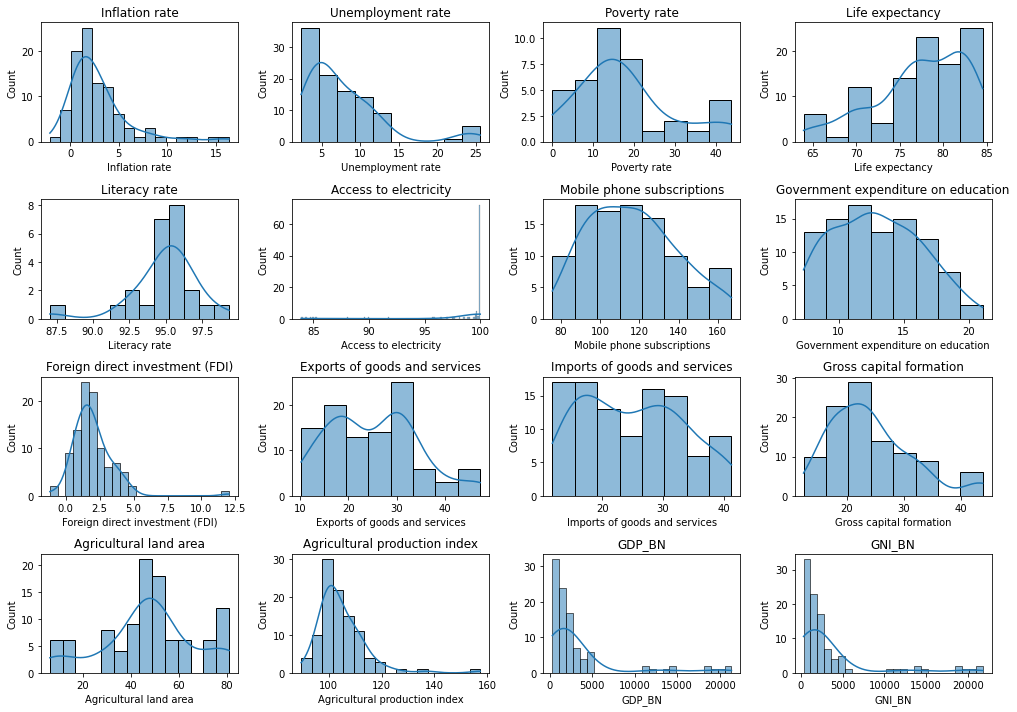

In [39]:
# Visualizing the distribution with the help of Histogram.

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(data=dff, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [40]:
# Calculating the Skewness of the columns:

dff[selected_cols].skew().sort_values()

Access to electricity                 -2.953445
Literacy rate                         -1.602850
Life expectancy                       -0.771439
Agricultural land area                -0.252813
Imports of goods and services          0.235545
Government expenditure on education    0.243095
Mobile phone subscriptions             0.376188
Exports of goods and services          0.428365
Poverty rate                           0.858115
Gross capital formation                1.003803
Unemployment rate                      1.964813
Inflation rate                         2.161412
GDP_BN                                 2.456700
GNI_BN                                 2.470220
Agricultural production index          2.502468
Foreign direct investment (FDI)        2.856433
dtype: float64

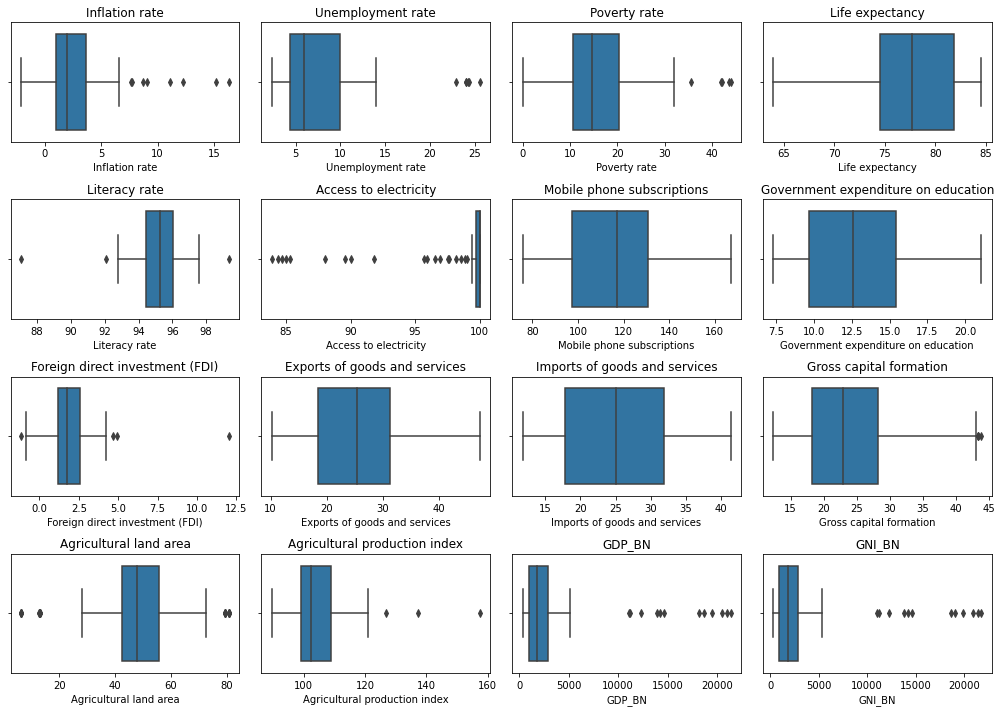

In [41]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.boxplot(data=dff, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [42]:
def outlier(x):
    # Calculate the first quartile (Q1)
    q1 = x.quantile(0.25)
    
    # Calculate the third quartile (Q3)
    q3 = x.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify outliers using the IQR rule
    # Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers
    
    return (x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)


In [43]:
# Initialize an empty list to store outlier percentages
outlier_percentages = []

# Iterate through each column in the selected columns
for col in selected_cols:
    # Extract the column data
    x = dff[col]
    
    # Use the previously defined outlier function to identify outliers in the column
    outliers = outlier(x)
    
    # Calculate the percentage of outliers in the column
    outlier_percentage = np.mean(outliers) * 100
    
    # Append the outlier percentage to the list
    outlier_percentages.append(outlier_percentage)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Column': selected_cols, 'Outlier Percentage': outlier_percentages})

# Sort the DataFrame by 'Outlier Percentage' in descending order
result_df = result_df.sort_values('Outlier Percentage', ascending=False)


In [44]:
result_df.round()

,Column,Outlier Percentage
12,Agricultural land area,24.0
5,Access to electricity,19.0
14,GDP_BN,12.0
15,GNI_BN,12.0
0,Inflation rate,8.0
1,Unemployment rate,6.0
2,Poverty rate,5.0
8,Foreign direct investment (FDI),4.0
11,Gross capital formation,4.0
4,Literacy rate,3.0


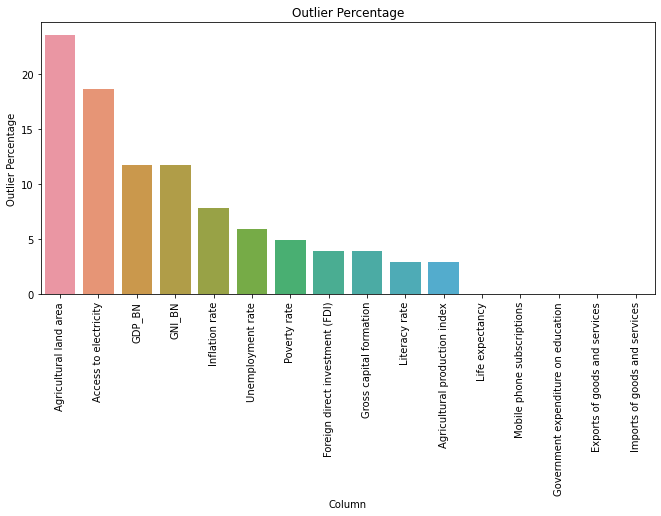

In [45]:
# Plotting the Percentage of the outliers calculted previously.

plt.figure(figsize=(11,5))
sns.barplot(x=result_df['Column'], y=result_df['Outlier Percentage'])
plt.title("Outlier Percentage")
plt.xticks(rotation=90)
plt.show()

In [46]:
dff.isnull().sum()

country                                 0
year                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          6
Unemployment rate                       0
Poverty rate                           64
Life expectancy                         0
Literacy rate                          78
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education     8
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                  0
Agricultural production index           0
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

### Correlation 

In [47]:
dff.corr()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN
Gross Domestic Product (GDP),1.000000,0.999877,-0.220522,-0.303889,-0.597827,0.168080,0.204164,0.192103,-0.153412,-0.039248,-0.056598,-0.374605,-0.366622,0.257080,-0.057234,-0.176167,1.000000,0.999877
Gross National Income (GNI),0.999877,1.000000,-0.222861,-0.303931,-0.598361,0.171469,0.206742,0.192444,-0.149550,-0.041892,-0.059635,-0.373265,-0.365166,0.249727,-0.060521,-0.177546,0.999877,1.000000
Inflation rate,-0.220522,-0.222861,1.000000,0.362163,-0.016228,-0.452413,-0.108695,-0.221841,-0.205852,0.250631,0.020693,-0.079740,0.000486,0.096622,0.084197,0.215174,-0.220522,-0.222861
Unemployment rate,-0.303889,-0.303931,0.362163,1.000000,0.198223,-0.507984,-0.435648,-0.704896,0.278397,0.246972,-0.172079,-0.040874,-0.045442,-0.398668,0.319911,0.076464,-0.303889,-0.303931
Poverty rate,-0.597827,-0.598361,-0.016228,0.198223,1.000000,-0.024084,-0.333772,0.142373,-0.011078,0.137968,0.094888,0.265652,0.298692,-0.773793,-0.096512,0.137357,-0.597827,-0.598361
Life expectancy,0.168080,0.171469,-0.452413,-0.507984,-0.024084,1.000000,0.528893,0.735267,-0.109543,-0.769879,0.075719,0.164173,0.145810,-0.086708,-0.390049,-0.311653,0.168080,0.171469
Literacy rate,0.204164,0.206742,-0.108695,-0.435648,-0.333772,0.528893,1.000000,0.483197,-0.237919,-0.465822,-0.200301,0.225974,0.191481,0.489018,-0.024695,0.253935,0.204164,0.206742
Access to electricity,0.192103,0.192444,-0.221841,-0.704896,0.142373,0.735267,0.483197,1.000000,-0.272123,-0.536453,0.164852,0.032203,0.013416,0.104276,-0.416050,-0.002428,0.192103,0.192444
Mobile phone subscriptions,-0.153412,-0.149550,-0.205852,0.278397,-0.011078,-0.109543,-0.237919,-0.272123,1.000000,-0.034205,-0.250438,-0.008846,-0.122771,-0.219369,0.189245,-0.165989,-0.153412,-0.149550
Government expenditure on education,-0.039248,-0.041892,0.250631,0.246972,0.137968,-0.769879,-0.465822,-0.536453,-0.034205,1.000000,0.138350,-0.236107,-0.171734,0.001424,0.285307,0.252690,-0.039248,-0.041892


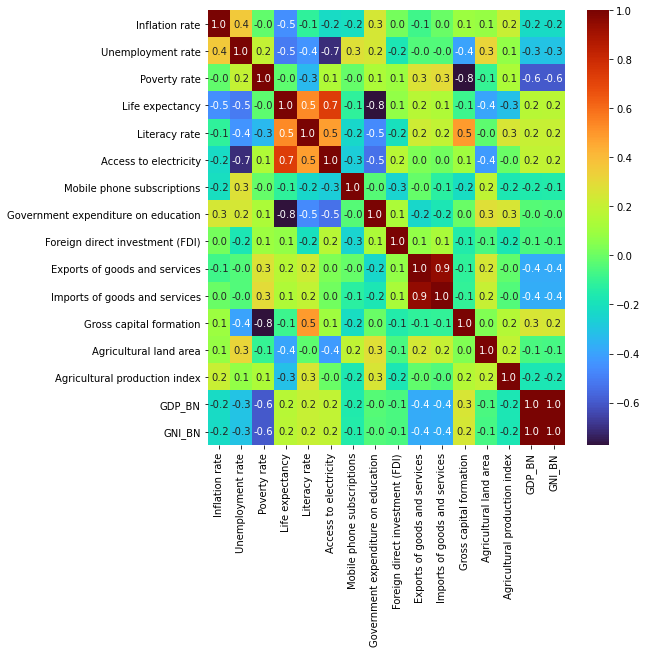

In [48]:
# Plotting the correlation using heatmap:


plt.figure(figsize=(8,8))
sns.heatmap(dff[selected_cols].corr(), annot=True, fmt='.1f', cmap='turbo')
plt.show()

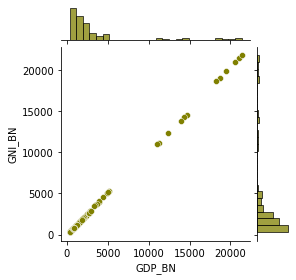

In [49]:
## Jointplot

sns.jointplot(x='GDP_BN', y='GNI_BN', data=dff, height=4, color='olive')
plt.show()

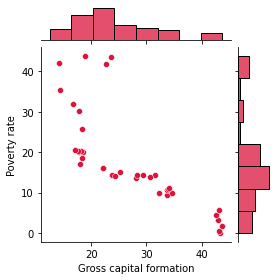

In [50]:
sns.jointplot(x='Gross capital formation', y='Poverty rate', data=dff, height=4, color='crimson')
plt.show()

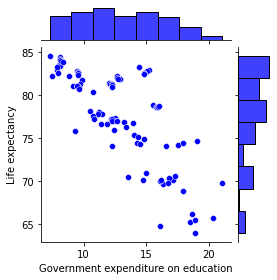

In [51]:
sns.jointplot(x='Government expenditure on education', y='Life expectancy', data=dff, height=4, color='blue')
plt.show()

In [52]:
def top_3(data, parameter):
    # Extract unique years from the 'year' column and sort them
    year_list = data['year'].dt.year.sort_values().unique()
    
    # Create an empty DataFrame to store the top 3 values for each year
    result_df = pd.DataFrame(columns=year_list, index=[1, 2, 3])
    
    # Iterate through each year in the sorted year_list
    for year in year_list:
        # Filter the data for the current year
        df_year = data[data['year'].dt.year == year]
        
        # Group by 'country', sum the values of the specified parameter, 
        # sort in descending order, and take the top 3 countries
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index
        
        # Assign the top 3 countries to the corresponding column in the result_df
        result_df[year] = value
    
    # Return the result DataFrame
    return result_df


In [53]:
from IPython.display import display

In [54]:
for i in selected_cols:
    result = top_3(dff,i)
    print(i)
    display(result)
    print('-------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Brazil,Brazil,Turkiye,Turkiye,Turkiye,Turkiye
2,Turkiye,Turkiye,Mexico,Mexico,South Africa,India
3,Indonesia,South Africa,South Africa,South Africa,Brazil,Saudi Arabia


-------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
2,Italy,Brazil,Brazil,Brazil,Turkiye,Brazil
3,France,Italy,Italy,Turkiye,Brazil,Turkiye


-------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Italy,Mexico,Argentina,Mexico,Argentina,Mexico
2,Turkiye,Argentina,Italy,Argentina,Italy,Argentina
3,Indonesia,Italy,United Kingdom,Italy,Germany,Italy


-------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Japan,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Italy,Italy,Italy,Australia
3,Australia,France,France,Australia,Australia,Italy


-------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Turkiye,Turkiye,Turkiye,Indonesia,Italy,Saudi Arabia
2,Indonesia,Indonesia,Saudi Arabia,Mexico,Turkiye,China
3,Mexico,Mexico,Mexico,Brazil,South Africa,Indonesia


-------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,United States,United States,Argentina,United States,Argentina,Argentina
2,Saudi Arabia,United Kingdom,Australia,Japan,Australia,Australia
3,Canada,Canada,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Indonesia,Indonesia,South Africa,South Africa,South Africa
2,South Africa,South Africa,South Africa,Japan,Japan,Japan
3,Italy,Argentina,Argentina,Italy,Italy,Indonesia


-------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Mexico,Indonesia,South Africa,South Africa,South Africa,South Africa
2,South Africa,Mexico,Mexico,Indonesia,Indonesia,Indonesia
3,Indonesia,India,Indonesia,Mexico,United States,Mexico


-------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,Canada,United Kingdom,United Kingdom,Australia,Brazil,United Kingdom
2,Brazil,Brazil,Australia,Germany,Canada,Germany
3,Australia,Mexico,Brazil,Brazil,Australia,Mexico


-------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Germany,Germany,Germany,Germany,Germany
2,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico
3,Saudi Arabia,Canada,Saudi Arabia,Saudi Arabia,Saudi Arabia,Canada


-------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Mexico,Germany,Mexico,Germany,Mexico
2,Saudi Arabia,Germany,Mexico,Germany,Mexico,Germany
3,Mexico,Canada,Canada,Canada,Canada,Turkiye


-------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,China,China,China,China,China,China
2,Saudi Arabia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Indonesia,Saudi Arabia,India,India,India,Turkiye


-------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Argentina,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Italy,Canada,Indonesia,Indonesia,India,Turkiye
3,France,United States,Turkiye,India,Turkiye,India


-------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------


In [55]:
# Extracting the year from the date time column.

dff['year_o'] = dff['year'].dt.year

In [56]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o
0,Argentina,2020-01-01,3.855404e+11,3.755360e+11,NaN,11.460,42.0,75.892,NaN,100.000000,...,12.42229,1.266826,16.610872,13.608927,14.130595,43.029265,109.35,385.540407,375.535963,2020
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,...,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.59,447.754687,430.166795,2019
2,Argentina,2018-01-01,5.248199e+11,5.060941e+11,NaN,9.220,32.0,76.999,NaN,99.993736,...,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.49,524.819899,506.094051,2018
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,...,13.26392,1.789365,11.320283,13.969318,18.212567,42.986381,106.03,643.628396,627.200467,2017
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.109,30.3,76.308,NaN,99.899742,...,13.35554,0.584749,12.527095,13.566793,17.663228,43.479495,100.95,557.532317,545.251638,2016


### Life Expectancy Analysis:

In [57]:
life_expectancy = pd.pivot_table(columns='year_o', index='country', values='Life expectancy', data=dff, aggfunc='mean').round(1)

In [58]:
life_expectancy.columns

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year_o')

In [59]:
life_expectancy

year_o,2015,2016,2017,2018,2019,2020
country,,,,,,
Argentina,76.8,76.3,76.8,77.0,77.3,75.9
Australia,82.4,82.4,82.5,82.7,82.9,83.2
Brazil,74.3,74.4,74.8,75.1,75.3,74.0
Canada,81.8,81.9,81.8,81.8,82.2,81.7
China,77.0,77.2,77.2,77.7,78.0,78.1
France,82.3,82.6,82.6,82.7,82.8,82.2
Germany,80.6,81.0,81.0,80.9,81.3,81.0
India,69.6,70.1,70.5,70.7,70.9,70.2
Indonesia,69.7,69.8,69.9,70.3,70.5,68.8


In [60]:
# Calculting the percentage change from 2015 to 2020. 

life_expectancy['perc_chg'] = round((life_expectancy[2020] - life_expectancy[2015])*100/life_expectancy[2015],1)

In [61]:
# Sorting the values in ascending order:

life_expectancy = life_expectancy.sort_values(ascending=False, by='perc_chg')

In [62]:
life_expectancy

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
South Africa,64.0,64.7,65.4,65.7,66.2,65.3,2.0
China,77.0,77.2,77.2,77.7,78.0,78.1,1.4
Australia,82.4,82.4,82.5,82.7,82.9,83.2,1.0
Japan,83.8,84.0,84.1,84.2,84.4,84.6,1.0
India,69.6,70.1,70.5,70.7,70.9,70.2,0.9
Germany,80.6,81.0,81.0,80.9,81.3,81.0,0.5
Canada,81.8,81.9,81.8,81.8,82.2,81.7,-0.1
France,82.3,82.6,82.6,82.7,82.8,82.2,-0.1
Brazil,74.3,74.4,74.8,75.1,75.3,74.0,-0.4


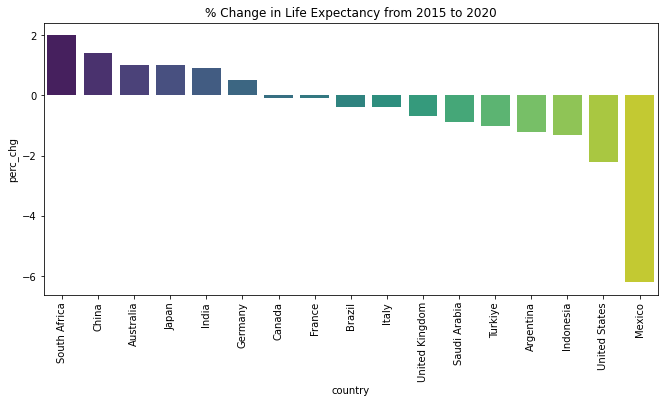

In [63]:
# Visualizing the plot of percentage change:

plt.figure(figsize=(11,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['perc_chg'], palette='viridis')
plt.title("% Change in Life Expectancy from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

### Analyzing the Foreign Direct Investments:

In [64]:
# Create a pivot table for Foreign Direct Investment (FDI) using 'year_o' as columns, 'country' as index, and 'FDI' as values
fdi = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=dff, aggfunc='mean').round(1)

# Calculate the percentage change in FDI between the years 2015 and 2020 for each country
fdi['perc_chg'] = round((fdi[2020] - fdi[2015]) * 100 / fdi[2015], 1)

# Sort the pivot table by the percentage change in descending order
fdi = fdi.sort_values(ascending=False, by='perc_chg')


In [65]:
fdi

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
Japan,0.1,0.8,0.4,0.5,0.8,1.2,1100.0
United Kingdom,1.5,12.0,4.7,-0.9,0.7,4.9,226.7
South Africa,0.4,0.7,0.5,1.4,1.3,0.9,125.0
Germany,1.9,1.9,3.0,4.2,1.9,4.1,115.8
India,2.1,1.9,1.5,1.6,1.8,2.4,14.3
Mexico,3.1,3.6,2.9,3.1,2.4,2.9,-6.5
Indonesia,2.3,0.5,2.0,1.8,2.2,1.8,-21.7
China,2.2,1.6,1.3,1.7,1.3,1.7,-22.7
Brazil,3.6,4.1,3.3,4.1,3.7,2.6,-27.8


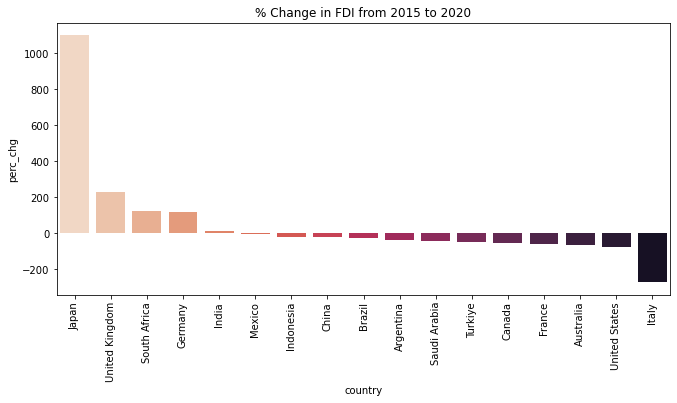

In [66]:
## Plotting the results 

plt.figure(figsize=(11,5))
sns.barplot(x=fdi.index, y=fdi['perc_chg'], palette='rocket_r')
plt.title("% Change in FDI from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

In [67]:
# Analyzing the Import-Export Aspects of the country:

dff['net_exim_bal'] = dff['Exports of goods and services'] - dff['Imports of goods and services']




In [68]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,net_exim_bal
0,Argentina,2020-01-01,3.855404e+11,3.755360e+11,NaN,11.460,42.0,75.892,NaN,100.000000,...,1.266826,16.610872,13.608927,14.130595,43.029265,109.35,385.540407,375.535963,2020,3.001945
1,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284,NaN,100.000000,...,1.485007,17.924878,14.705737,14.210030,42.590779,112.59,447.754687,430.166795,2019,3.219142
2,Argentina,2018-01-01,5.248199e+11,5.060941e+11,NaN,9.220,32.0,76.999,NaN,99.993736,...,2.232532,14.436686,16.325850,16.613885,42.371536,97.49,524.819899,506.094051,2018,-1.889164
3,Argentina,2017-01-01,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833,NaN,100.000000,...,1.789365,11.320283,13.969318,18.212567,42.986381,106.03,643.628396,627.200467,2017,-2.649034
4,Argentina,2016-01-01,5.575323e+11,5.452516e+11,NaN,8.109,30.3,76.308,NaN,99.899742,...,0.584749,12.527095,13.566793,17.663228,43.479495,100.95,557.532317,545.251638,2016,-1.039698


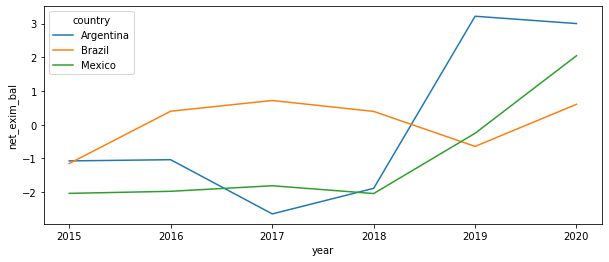

In [69]:
# South American Countries:

plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['Argentina', 'Brazil','Mexico'])], hue='country', ci=False)
plt.show()

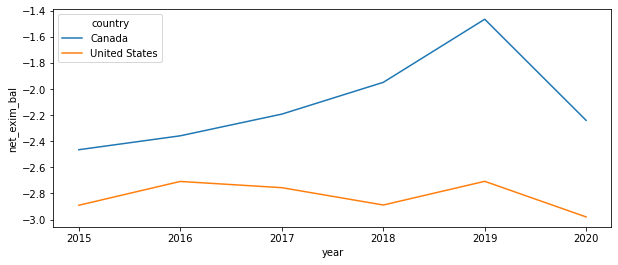

In [70]:
# US and Canada:

plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['Canada','United States'])], hue='country', ci=False)
plt.show()

In [71]:
dff.to_excel("GDP_Data.xlsx")